# Датасет: Bike Sharing Dataset

## Задание 4: Анализ и прогнозирование спроса на услуги проката велосипедов

**Автор:** Собченко Анастасия Алексеевна   
**Дата:** 29 сентября 2024 г.  
**Версия:** 1.0  

---

## Описание задач проекта

1. Анализ данных: Исследуйте сезонные и временные паттерны в данных о прокате велосипедов. Постройте графики зависимости спроса на велосипеды от погодных условий, времени суток и дня недели.

2. Моделирование спроса: Постройте модель для прогнозирования спроса на велосипеды в зависимости от погодных условий, времени суток, дня недели и других факторов. Используйте модели регрессии для оценки влияния различных факторов на спрос.

3. Оценка модели: Оцените точность прогноза с использованием метрик (например, MAE, RMSE). Проанализируйте, какие факторы наиболее значимы для прогноза.

4. Рекомендации для бизнеса: На основе анализа данных предложите рекомендации для оптимизации работы службы проката (например, увеличение числа велосипедов в пиковые часы).

---

## Содержание

1. [Анализ данных](#1.-Анализ-данных)

- 1.1. [Импорт библиотек, загрузка данных](#1.1.-Импорт-библиотек,-загрузка-данных)
- 1.2. [Связь датасетов day и hour](#1.2.-Связь-датасетов-day-и-hour)
- 1.3. [Описательная статистика](#1.3.-Описательная-статистика)
- 1.4. [Корреляционная матрица](#1.4.-Корреляционная-матрица)
- 1.5. [Визуализация зависимости целевой переменной от других признаков](#1.5.-Визуализация-зависимости-целевой-переменной-от-других-признаков)

2. [Модели](#2.-Модели)

- 2.1. [Подготовка данных](#2.1.-Подготовка-данных)
- 2.2. [Linear Regression](#2.2.-Linear-Regression)
- 2.3. [RandomForestRegressor](#2.3.-RandomForestRegressor)
- 2.4. [XGBRegressor](#2.4.-XGBRegressor)
- 2.5. [CatBoost Regressor](#2.5.-CatBoost-Regressor)

3. [Заключение](#3.-Заключение)

---

## Контакты

**Email:** lobzinastya@gmail.com  

# 1. Анализ данных

## 1.1. Импорт библиотек, загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

sns.set_style('white') 

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.5f}'.format)
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

In [2]:
palette_color = sns.color_palette('viridis', n_colors = 7)
two_colors = [palette_color[2],palette_color[-1]]

Загружаем данные

In [3]:
file_path = ''

df_day = pd.read_csv(file_path + 'day.csv', index_col=0)
df_day.head(10)


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.34417,0.36362,0.80583,0.16045,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.36348,0.35374,0.69609,0.24854,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.19636,0.18940,0.43727,0.24831,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.20000,0.21212,0.59044,0.16030,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.22696,0.22927,0.43696,0.18690,82,1518,1600
6,2011-01-06,1,0,1,0,4,1,1,0.20435,0.23321,0.51826,0.08957,88,1518,1606
7,2011-01-07,1,0,1,0,5,1,2,0.19652,0.20884,0.49870,0.16873,148,1362,1510
8,2011-01-08,1,0,1,0,6,0,2,0.16500,0.16225,0.53583,0.26680,68,891,959
9,2011-01-09,1,0,1,0,0,0,1,0.13833,0.11618,0.43417,0.36195,54,768,822


In [4]:
df_hour = pd.read_csv(file_path +'hour.csv', index_col=0)
df_hour.head(10)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24000,0.28790,0.81000,0.00000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22000,0.27270,0.80000,0.00000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22000,0.27270,0.80000,0.00000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24000,0.28790,0.75000,0.00000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24000,0.28790,0.75000,0.00000,0,1,1
6,2011-01-01,1,0,1,5,0,6,0,2,0.24000,0.25760,0.75000,0.08960,0,1,1
7,2011-01-01,1,0,1,6,0,6,0,1,0.22000,0.27270,0.80000,0.00000,2,0,2
8,2011-01-01,1,0,1,7,0,6,0,1,0.20000,0.25760,0.86000,0.00000,1,2,3
9,2011-01-01,1,0,1,8,0,6,0,1,0.24000,0.28790,0.75000,0.00000,1,7,8


Проверяем типы данных, наличие нулевых значений (отсутствуют)

In [5]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 731 entries, 1 to 731
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.4+ KB


In [6]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.3+ MB


## 1.2. Связь датасетов day и hour

Какие дни охватывают датасеты по дням и по часам? Один и тот же период? да

In [7]:
df_day.dteday.unique()

array(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
       '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
       '2011-01-09', '2011-01-10', '2011-01-11', '2011-01-12',
       '2011-01-13', '2011-01-14', '2011-01-15', '2011-01-16',
       '2011-01-17', '2011-01-18', '2011-01-19', '2011-01-20',
       '2011-01-21', '2011-01-22', '2011-01-23', '2011-01-24',
       '2011-01-25', '2011-01-26', '2011-01-27', '2011-01-28',
       '2011-01-29', '2011-01-30', '2011-01-31', '2011-02-01',
       '2011-02-02', '2011-02-03', '2011-02-04', '2011-02-05',
       '2011-02-06', '2011-02-07', '2011-02-08', '2011-02-09',
       '2011-02-10', '2011-02-11', '2011-02-12', '2011-02-13',
       '2011-02-14', '2011-02-15', '2011-02-16', '2011-02-17',
       '2011-02-18', '2011-02-19', '2011-02-20', '2011-02-21',
       '2011-02-22', '2011-02-23', '2011-02-24', '2011-02-25',
       '2011-02-26', '2011-02-27', '2011-02-28', '2011-03-01',
       '2011-03-02', '2011-03-03', '2011-03-04', '2011-

In [8]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

df_hour.dteday.unique()

<DatetimeArray>
['2011-01-01 00:00:00', '2011-01-02 00:00:00', '2011-01-03 00:00:00',
 '2011-01-04 00:00:00', '2011-01-05 00:00:00', '2011-01-06 00:00:00',
 '2011-01-07 00:00:00', '2011-01-08 00:00:00', '2011-01-09 00:00:00',
 '2011-01-10 00:00:00',
 ...
 '2012-12-22 00:00:00', '2012-12-23 00:00:00', '2012-12-24 00:00:00',
 '2012-12-25 00:00:00', '2012-12-26 00:00:00', '2012-12-27 00:00:00',
 '2012-12-28 00:00:00', '2012-12-29 00:00:00', '2012-12-30 00:00:00',
 '2012-12-31 00:00:00']
Length: 731, dtype: datetime64[ns]

Соберем датасет по дням аренды из датасета по часам путем агрегации значений разными функциями (например температура за день - среднее всех значений температур, сasual/registered/cnt для числа велосипедов это сумма значений, и добавим в эту агрегированную таблицу признак num_hours - количество записей про этот день из датасета по часам

In [9]:
df_day_grouped_from_hour = df_hour.groupby('dteday').agg({
    
    'season':pd.Series.mode, 
    'yr':pd.Series.mode, 
    'mnth':pd.Series.mode,
    'holiday':pd.Series.mode, 
    
    'weekday':pd.Series.mode, 
    'workingday':pd.Series.mode, 
    'weathersit':'mean', 

    'temp':'mean',
    'atemp':'mean',
    'hum':'mean',
    'windspeed':'mean',
    'casual':'sum',
    'registered':'sum',
    
    'cnt': 'sum',
    'dteday': 'count'
}).rename(columns={'dteday':'num_hours'})

df_day_grouped_from_hour['weathersit'] = df_day_grouped_from_hour['weathersit'].round(0).astype('int')

df_day_grouped_from_hour.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,num_hours
dteday,,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.34417,0.36363,0.80583,0.16045,331,654,985,24
2011-01-02,1,0,1,0,0,0,2,0.36348,0.35374,0.69609,0.24854,131,670,801,23
2011-01-03,1,0,1,0,1,1,1,0.19636,0.18940,0.43727,0.24831,120,1229,1349,22
2011-01-04,1,0,1,0,2,1,1,0.20000,0.21212,0.59043,0.16030,108,1454,1562,23
2011-01-05,1,0,1,0,3,1,1,0.22696,0.22927,0.43696,0.18690,82,1518,1600,23
2011-01-06,1,0,1,0,4,1,1,0.20435,0.23321,0.51826,0.08957,88,1518,1606,23
2011-01-07,1,0,1,0,5,1,2,0.19652,0.20884,0.49870,0.16873,148,1362,1510,23
2011-01-08,1,0,1,0,6,0,2,0.16500,0.16225,0.53583,0.26680,68,891,959,24
2011-01-09,1,0,1,0,0,0,1,0.13833,0.11617,0.43417,0.36195,54,768,822,24


In [10]:
df_day.set_index('dteday', inplace=True)
df_day

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.34417,0.36362,0.80583,0.16045,331,654,985
2011-01-02,1,0,1,0,0,0,2,0.36348,0.35374,0.69609,0.24854,131,670,801
2011-01-03,1,0,1,0,1,1,1,0.19636,0.18940,0.43727,0.24831,120,1229,1349
2011-01-04,1,0,1,0,2,1,1,0.20000,0.21212,0.59044,0.16030,108,1454,1562
2011-01-05,1,0,1,0,3,1,1,0.22696,0.22927,0.43696,0.18690,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,1,1,12,0,4,1,2,0.25417,0.22664,0.65292,0.35013,247,1867,2114
2012-12-28,1,1,12,0,5,1,2,0.25333,0.25505,0.59000,0.15547,644,2451,3095
2012-12-29,1,1,12,0,6,0,2,0.25333,0.24240,0.75292,0.12438,159,1182,1341


Сравним данный датасет по дням и полученный датасет по дням из часового датасета

In [11]:
is_equal = df_day.equals(df_day_grouped_from_hour[df_day.columns])
print('Идентичны ли датафреймы:', is_equal)

Идентичны ли датафреймы: False


In [12]:
df_day.index = pd.to_datetime(df_day.index)

In [13]:
print('Сколько индексов различается:',(df_day_grouped_from_hour.index != df_day.index).sum())

Сколько индексов различается: 0


Мы хотим понять в чем именно отличаются получившиеся датасеты

Зададим некоторую точность и посмотрим суть отличий

In [14]:
cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit',
'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt']

precision = 2

differences = (df_day[cols].round(precision)).compare(df_day_grouped_from_hour[cols].round(precision), align_axis=0)
print(differences)
print(differences.shape)
print(f"С округлением до {precision} знаков после запятой различия в изначальном датасете по дням и датасете собранном в дни из часового датасета составляют")

print(f"Разница в {differences.shape[1]} столбцах, всего различается {int(differences.shape[0]/2)} строк")

                  weathersit    temp     hum
dteday                                      
2011-03-25 self          NaN     NaN 0.50000
           other         NaN     NaN 0.49000
2011-04-16 self      3.00000     NaN     NaN
           other     2.00000     NaN     NaN
2011-07-16 self          NaN     NaN 0.58000
           other         NaN     NaN 0.59000
2011-09-25 self          NaN     NaN 0.84000
           other         NaN     NaN 0.85000
2012-02-11 self      3.00000     NaN     NaN
           other     2.00000     NaN     NaN
2012-03-13 self          NaN 0.56000     NaN
           other         NaN 0.57000     NaN
2012-05-09 self          NaN 0.57000     NaN
           other         NaN 0.58000     NaN
2012-05-24 self          NaN 0.66000     NaN
           other         NaN 0.65000     NaN
2012-11-12 self          NaN 0.48000     NaN
           other         NaN 0.49000     NaN
2012-12-05 self          NaN     NaN 0.48000
           other         NaN     NaN 0.49000
(20, 3)
С 

Видимо датасеты отличаются только тем, что из-за разной процедуры выгрузки округлений в некоторых строках точность осчитанной температуры/влажности могут отличаться

Можно считать, что дневной датасет соответствует почасовому, просто в ходе его изначального формирования были учтены какие-то другие порядки округлений (некритично)

#### Найти дни, в которых наблюдений по часам меньше 24 и понять почему

В нашем датасете по дням, полученным из часовых данных есть новый признак - количество почасовых записей по данному дню. Логично, что так как у нас есть все почасовые данные, то значение этого признако должно быть константым и равно 24 (24 часа в сутках). Но в реальности это не так

In [15]:
df_day_grouped_from_hour['num_hours'].value_counts()

num_hours
24    655
23     62
22      6
18      2
12      1
16      1
8       1
17      1
1       1
11      1
Name: count, dtype: int64

Найдем дни, в которых не хватает почасовых записей (то есть дни с неполной почасовой информацией)

In [16]:
days_incomplete = pd.DataFrame(df_day_grouped_from_hour[df_day_grouped_from_hour['num_hours'] <24]['num_hours']).sort_values(by=['num_hours'])
days_incomplete

,num_hours
dteday,
2012-10-29,1
2011-01-27,8
2012-10-30,11
2011-01-18,12
2011-01-26,16
...,...
2012-12-24,23
2011-03-11,23
2011-03-13,23


Почему некоторых наблюдений меньше 24? Получается по некоторым часам нет данных об аренде
Проверим гипотезу, что в датасете по часам нет значений cnt == 0
Потом в описательной статистике действительно видно, что минимальное значение = 1

In [17]:
df_hour[df_hour['cnt'] == 0]

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,


Что же это за дни такие странные, где данные по часовой аренде содержат данные по такому небольшому число часов из суток (и эти дни обычно соседствуют с подобными неполными днями)
*  за 1 час из 24: 29.10.2012
*  за 11 час из 24: 30.10.2012

**Причина:** Ураган «Сэнди» в Нью-Йорке (28-29 октября: 
С вечера 28 октября в Нью-Йорке прекращают работу метро, автобусы и поезд, 30 октября - максимальная мощность)

*  за 8 час из 24: 2011-01-27
*  за 16 час из 24: 2011-01-26

**Причина:** Северо-восточные районы США в среду 26 января накрыла снежная буря. В Нью-Йорке зафиксирован городской рекорд для января – снежный покров достигал более 50 сантиметров. = January 25–27, 2011 North American blizzard

 То есть с учетом такой погоды в эти дни просто никто на весь город не арендовал ни одного велосипеда (возможно аренда была остановлена вовсе)
 
 Однако для многих неполных дней данные по часам содержат 23 записи из 24. Что видимо просто означает, что из-за низкого спроса (и может быть плохой погоды) был такой час за сутки, когда действительно никто ничего не арендовал.
 
 Но для тех дней в которых число почасовых наблюдений, например, меньше 18 (то есть 6 часов без аренды велосипедов), можно сделать новый признак is_force_majeure

In [18]:
df_day_grouped_from_hour['is_force_majeure'] = (df_day_grouped_from_hour['num_hours']<=18).astype('int')

Вот таблица с такими днями, для которых is_force_majeure == 1

In [19]:
df_day_grouped_from_hour[df_day_grouped_from_hour['is_force_majeure'] ==1]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,num_hours,is_force_majeure
dteday,,,,,,,,,,,,,,,,
2011-01-18,1,0,1,0,2,1,2,0.21667,0.23233,0.86167,0.14678,9,674,683,12,1
2011-01-26,1,0,1,0,3,1,3,0.21750,0.20360,0.86250,0.29385,34,472,506,16,1
2011-01-27,1,0,1,0,4,1,1,0.19500,0.21970,0.68750,0.11384,15,416,431,8,1
2011-02-22,1,0,2,0,2,1,1,0.18222,0.18603,0.57778,0.19568,74,1376,1450,18,1
2011-08-27,3,0,8,0,6,0,2,0.68000,0.63556,0.85000,0.37562,226,889,1115,18,1
2011-08-28,3,0,8,0,0,0,1,0.70706,0.64796,0.56176,0.30466,1415,2919,4334,17,1
2012-10-29,4,1,10,0,1,1,3,0.44000,0.43940,0.88000,0.35820,2,20,22,1,1
2012-10-30,4,1,10,0,2,1,2,0.31818,0.30991,0.82545,0.21301,87,1009,1096,11,1


## 1.3. Описательная статистика

In [20]:
df_day.describe().T

,count,mean,std,min,25%,50%,75%,max
season,731.00000,2.49658,1.11081,1.00000,2.00000,3.00000,3.00000,4.00000
yr,731.00000,0.50068,0.50034,0.00000,0.00000,1.00000,1.00000,1.00000
mnth,731.00000,6.51984,3.45191,1.00000,4.00000,7.00000,10.00000,12.00000
holiday,731.00000,0.02873,0.16715,0.00000,0.00000,0.00000,0.00000,1.00000
weekday,731.00000,2.99726,2.00479,0.00000,1.00000,3.00000,5.00000,6.00000
workingday,731.00000,0.68399,0.46523,0.00000,0.00000,1.00000,1.00000,1.00000
weathersit,731.00000,1.39535,0.54489,1.00000,1.00000,1.00000,2.00000,3.00000
temp,731.00000,0.49538,0.18305,0.05913,0.33708,0.49833,0.65542,0.86167
atemp,731.00000,0.47435,0.16296,0.07907,0.33784,0.48673,0.60860,0.84090
hum,731.00000,0.62789,0.14243,0.00000,0.52000,0.62667,0.73021,0.97250


In [21]:
df_hour.describe().T

,count,mean,min,25%,50%,75%,max,std
dteday,17379,2012-01-02 04:08:34.552045568,2011-01-01 00:00:00,2011-07-04 00:00:00,2012-01-02 00:00:00,2012-07-02 00:00:00,2012-12-31 00:00:00,NaN
season,17379.00000,2.50164,1.00000,2.00000,3.00000,3.00000,4.00000,1.10692
yr,17379.00000,0.50256,0.00000,0.00000,1.00000,1.00000,1.00000,0.50001
mnth,17379.00000,6.53778,1.00000,4.00000,7.00000,10.00000,12.00000,3.43878
hr,17379.00000,11.54675,0.00000,6.00000,12.00000,18.00000,23.00000,6.91441
holiday,17379.00000,0.02877,0.00000,0.00000,0.00000,0.00000,1.00000,0.16717
weekday,17379.00000,3.00368,0.00000,1.00000,3.00000,5.00000,6.00000,2.00577
workingday,17379.00000,0.68272,0.00000,0.00000,1.00000,1.00000,1.00000,0.46543
weathersit,17379.00000,1.42528,1.00000,1.00000,1.00000,2.00000,4.00000,0.63936
temp,17379.00000,0.49699,0.02000,0.34000,0.50000,0.66000,1.00000,0.19256


In [22]:
df_day.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.34417,0.36362,0.80583,0.16045,331,654,985
2011-01-02,1,0,1,0,0,0,2,0.36348,0.35374,0.69609,0.24854,131,670,801
2011-01-03,1,0,1,0,1,1,1,0.19636,0.18940,0.43727,0.24831,120,1229,1349
2011-01-04,1,0,1,0,2,1,1,0.20000,0.21212,0.59044,0.16030,108,1454,1562
2011-01-05,1,0,1,0,3,1,1,0.22696,0.22927,0.43696,0.18690,82,1518,1600
2011-01-06,1,0,1,0,4,1,1,0.20435,0.23321,0.51826,0.08957,88,1518,1606
2011-01-07,1,0,1,0,5,1,2,0.19652,0.20884,0.49870,0.16873,148,1362,1510
2011-01-08,1,0,1,0,6,0,2,0.16500,0.16225,0.53583,0.26680,68,891,959
2011-01-09,1,0,1,0,0,0,1,0.13833,0.11618,0.43417,0.36195,54,768,822


Подозрительно похоже, что признаки casual и registred в сумме дают cnt. Проверим гипотезу, что это верно для всех дней

In [23]:
print('Количество строк, где casual + registred != cnt',(df_day['casual'] + df_day['registered'] == df_day['cnt']).isna().sum())

Количество строк, где casual + registred != cnt 0


**ВАЖНО** Если наша целевая переменная cnt это сумма casual + registred 

## 1.4. Корреляционная матрица

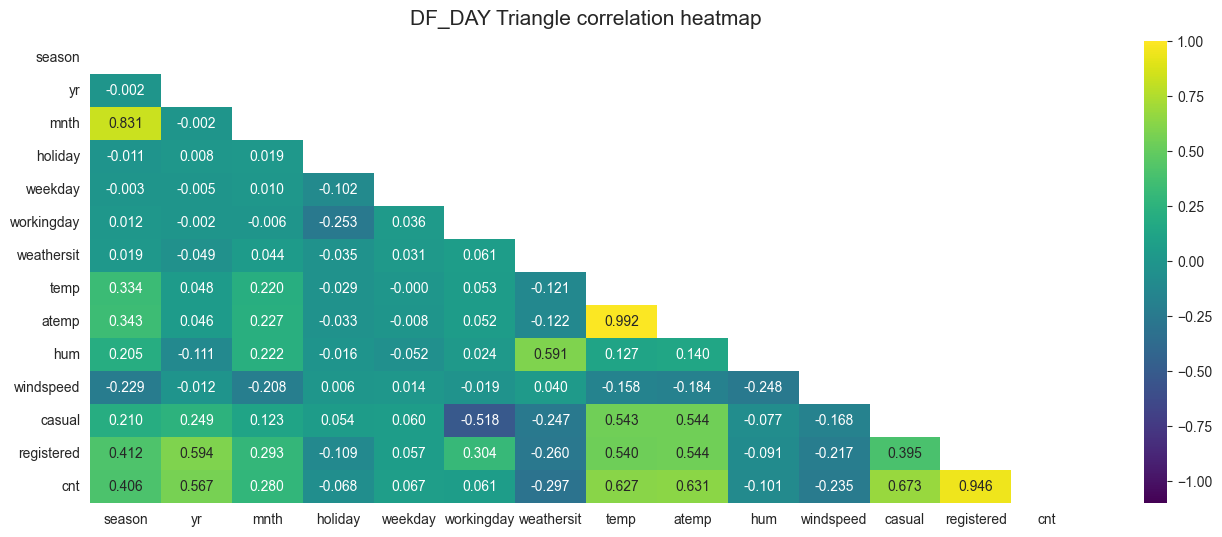

In [24]:
corr_matr = df_day.select_dtypes(exclude=['datetime']).corr()

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(corr_matr, dtype='bool'))
heatmap = sns.heatmap(corr_matr, mask=mask,vmin=1, vmax=-1, annot=True,fmt=".3f", cmap=sns.color_palette("viridis", as_cmap=True), annot_kws={'size': 10})
heatmap.set_title('DF_DAY Triangle correlation heatmap', fontdict={'fontsize':15}, pad=12);

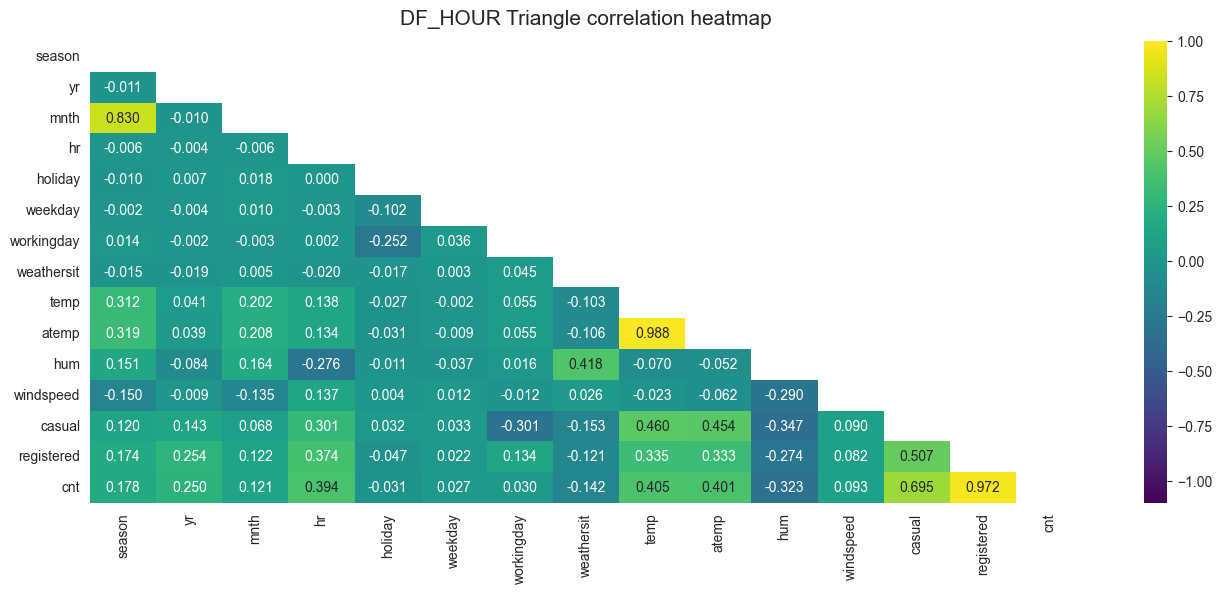

In [25]:
corr_matr_hour = df_hour.select_dtypes(exclude=['datetime']).corr()

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(corr_matr_hour, dtype='bool'))
heatmap = sns.heatmap(corr_matr_hour, mask=mask,vmin=1, vmax=-1, annot=True,fmt=".3f", cmap=sns.color_palette("viridis", as_cmap=True), annot_kws={'size': 10})
heatmap.set_title('DF_HOUR Triangle correlation heatmap', fontdict={'fontsize':15}, pad=12);

Корреляции с целевым признаком (по данным из day и по данным из hour)

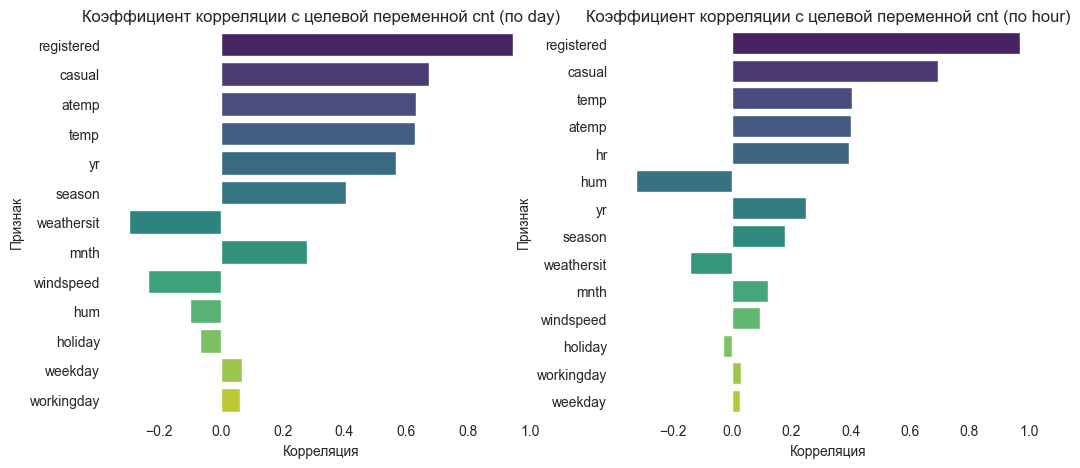

,corr_coef_day_data,corr_coef_hour_data
registered,0.94552,0.97215
casual,0.67280,0.69456
atemp,0.63107,0.40093
temp,0.62749,0.40477
yr,0.56671,0.25049
season,0.40610,0.17806
weathersit,-0.29739,-0.14243
mnth,0.27998,0.12064
windspeed,-0.23454,0.09323
hum,-0.10066,-0.32291


In [26]:
cnt_corr = pd.DataFrame(corr_matr['cnt']).rename(columns={'cnt':'corr_coef'})
cnt_corr.drop(index='cnt', inplace=True)
cnt_corr.sort_values(by='corr_coef', key=abs, ascending = False, inplace=True)

cnt_corr_hour = pd.DataFrame(corr_matr_hour['cnt']).rename(columns={'cnt':'corr_coef'})
cnt_corr_hour.drop(index='cnt', inplace=True)
cnt_corr_hour.sort_values(by='corr_coef', key=abs, ascending = False, inplace=True)


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(data=cnt_corr, y=cnt_corr.index, x= 'corr_coef', hue= cnt_corr.index, palette='viridis')
plt.ylabel('Признак', fontsize=10)  
plt.xlabel('Корреляция', fontsize=10)  
sns.despine(left=True, bottom=True)
plt.title('Коэффициент корреляции с целевой переменной cnt (по day)', fontsize=12)


plt.subplot(1,2,2)
ax = sns.barplot(data=cnt_corr_hour, y=cnt_corr_hour.index, x= 'corr_coef', hue= cnt_corr_hour.index, palette='viridis')
plt.ylabel('Признак', fontsize=10)  
plt.xlabel('Корреляция', fontsize=10)  
sns.despine(left=True, bottom=True)
plt.title('Коэффициент корреляции с целевой переменной cnt (по hour)', fontsize=12)
plt.show()

cnt_corr = pd.concat([cnt_corr, cnt_corr_hour], axis=1)
cnt_corr.columns = ['corr_coef_day_data', 'corr_coef_hour_data']
cnt_corr

**Выводы:**

По приведенным корреляционным матрицам что есть пары признаков с значительной корреляцией temp и atemp, mnth и season,
cnt и registered, cnt и casual

Таблица корреляции с целевой переменной по данным двух источников (дневному и почасовому) также приведена выше

## 1.5. Визуализация зависимости целевой переменной от других признаков

Построим тепловые карты спроса велосипедов по месяцам и днём недели, за 2011 и 2012 год (с одинаковой шкалой)


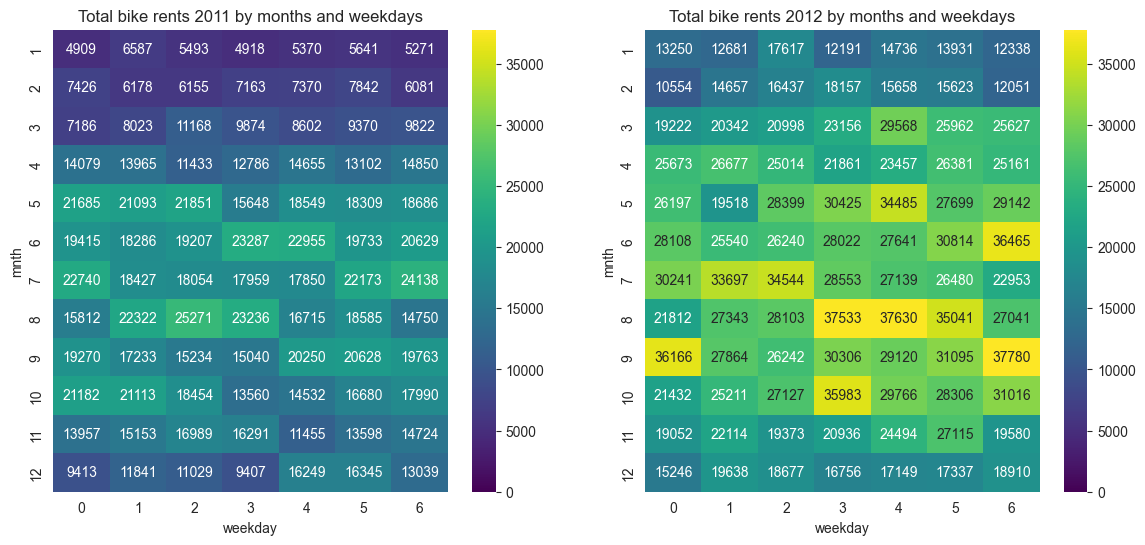

In [27]:
month_weekday_pivot_2011 = pd.pivot_table(df_day[df_day.index.year==2011], index=['mnth'], columns=['weekday'],values='cnt', aggfunc='sum')
month_weekday_pivot_2012 = pd.pivot_table(df_day[df_day.index.year==2012], index=['mnth'], columns=['weekday'],values='cnt', aggfunc='sum')
vmax = max(np.array(month_weekday_pivot_2011).max(),np.array(month_weekday_pivot_2012).max())


plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.heatmap(month_weekday_pivot_2011, vmin=0, vmax=vmax, annot=True,fmt=".0f", cmap=sns.color_palette("viridis", as_cmap=True), annot_kws={'size': 10})
plt.title('Total bike rents 2011 by months and weekdays')

plt.subplot(1,2,2)
sns.heatmap(month_weekday_pivot_2012,  vmin=0, vmax=vmax, annot=True,fmt=".0f", cmap=sns.color_palette("viridis", as_cmap=True), annot_kws={'size': 10})
plt.title('Total bike rents 2012 by months and weekdays')

plt.show()

In [28]:
df_day

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.34417,0.36362,0.80583,0.16045,331,654,985
2011-01-02,1,0,1,0,0,0,2,0.36348,0.35374,0.69609,0.24854,131,670,801
2011-01-03,1,0,1,0,1,1,1,0.19636,0.18940,0.43727,0.24831,120,1229,1349
2011-01-04,1,0,1,0,2,1,1,0.20000,0.21212,0.59044,0.16030,108,1454,1562
2011-01-05,1,0,1,0,3,1,1,0.22696,0.22927,0.43696,0.18690,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,1,1,12,0,4,1,2,0.25417,0.22664,0.65292,0.35013,247,1867,2114
2012-12-28,1,1,12,0,5,1,2,0.25333,0.25505,0.59000,0.15547,644,2451,3095
2012-12-29,1,1,12,0,6,0,2,0.25333,0.24240,0.75292,0.12438,159,1182,1341


Зависимость целевой переменной от года, сезона, месяца, дней недели

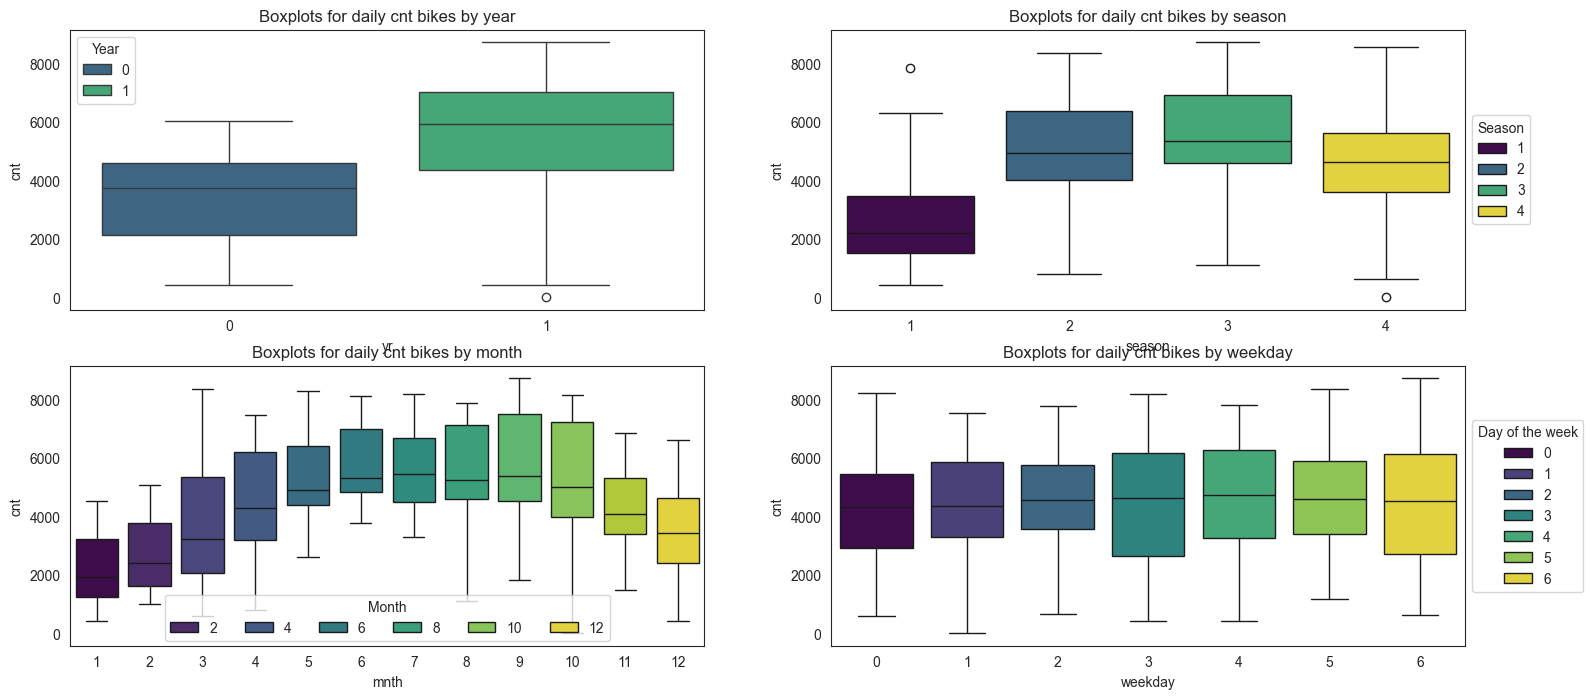

In [29]:
plt.figure(figsize=(18, 8))

plt.subplot(2,2,1)
sns.boxplot(y = df_day['cnt'], x= df_day['yr'], hue = df_day['yr'], palette= 'viridis')
plt.title('Boxplots for daily cnt bikes by year')
plt.legend(loc='upper left', bbox_to_anchor=(0, 1), title='Year')

plt.subplot(2,2,2)
sns.boxplot(y = df_day['cnt'], x= df_day['season'], hue = df_day['season'], palette= 'viridis')
plt.title('Boxplots for daily cnt bikes by season')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Season')


plt.subplot(2,2,3)
sns.boxplot(y = df_day['cnt'], x= df_day['mnth'], hue = df_day['mnth'], palette= 'viridis')
plt.title('Boxplots for daily cnt bikes by month')
plt.legend(title='Month', loc='center', bbox_to_anchor=(0.5, 0.1), ncol=12) 

plt.subplot(2,2,4)
sns.boxplot(y = df_day['cnt'], x= df_day['weekday'], hue = df_day['weekday'], palette= 'viridis')
plt.title('Boxplots for daily cnt bikes by weekday')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Day of the week')

plt.show()

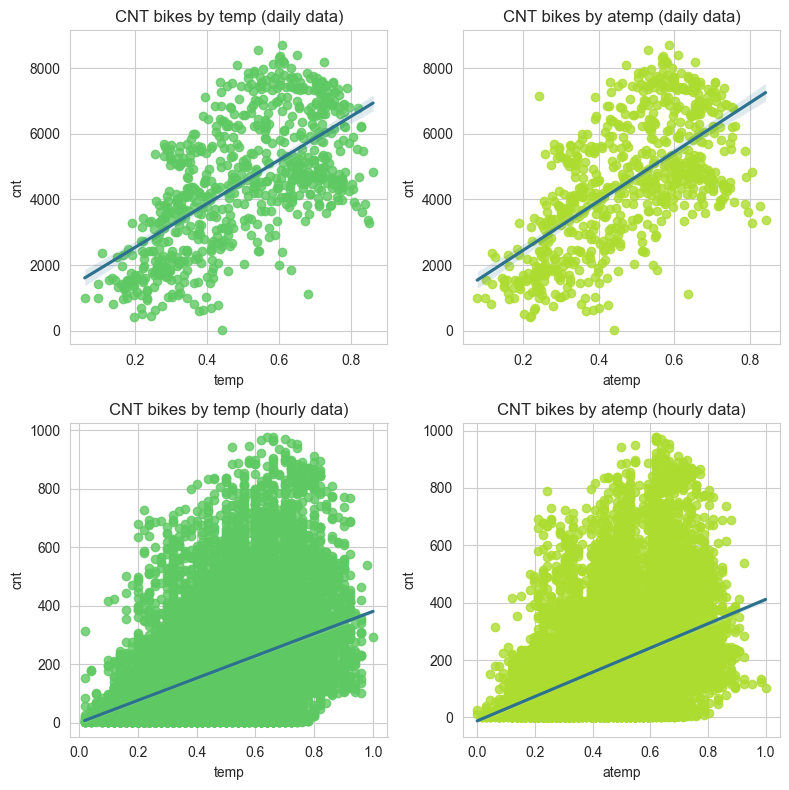

In [30]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 8))

plt.subplot(2,2,1)
sns.regplot(data=df_day, x='temp', y='cnt', color=palette_color[5], line_kws={'color': palette_color[2]})
plt.title('CNT bikes by temp (daily data)')

plt.subplot(2,2,2)
sns.regplot(data=df_day, x='atemp', y='cnt', color=palette_color[6], line_kws={'color': palette_color[2]})
plt.title('CNT bikes by atemp (daily data)')
plt.tight_layout()

plt.subplot(2,2,3)
sns.regplot(data=df_hour, x='temp', y='cnt', color=palette_color[5], line_kws={'color': palette_color[2]})
plt.title('CNT bikes by temp (hourly data)')

plt.subplot(2,2,4)
sns.regplot(data=df_hour, x='atemp', y='cnt', color=palette_color[6], line_kws={'color': palette_color[2]})
plt.title('CNT bikes by atemp (hourly data)')

plt.tight_layout()
plt.show()

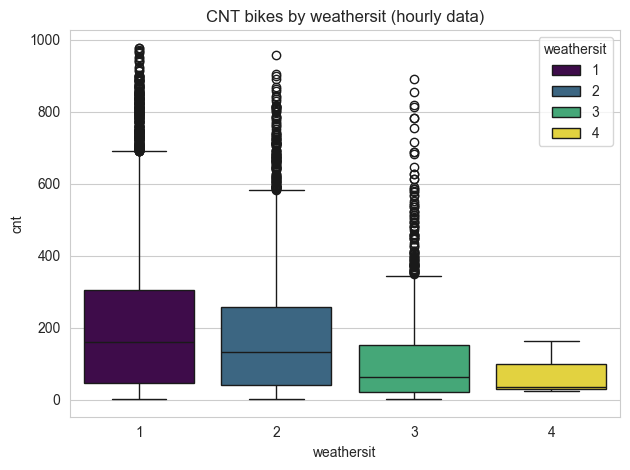

In [31]:
sns.boxplot(data=df_hour, x='weathersit', y='cnt', hue = 'weathersit', palette='viridis')
plt.title('CNT bikes by weathersit (hourly data)')
plt.tight_layout()
plt.show()

In [32]:
df_hour

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24000,0.28790,0.81000,0.00000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22000,0.27270,0.80000,0.00000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22000,0.27270,0.80000,0.00000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24000,0.28790,0.75000,0.00000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24000,0.28790,0.75000,0.00000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,2012-12-31,1,1,12,19,0,1,1,2,0.26000,0.25760,0.60000,0.16420,11,108,119
17376,2012-12-31,1,1,12,20,0,1,1,2,0.26000,0.25760,0.60000,0.16420,8,81,89
17377,2012-12-31,1,1,12,21,0,1,1,1,0.26000,0.25760,0.60000,0.16420,7,83,90


# 2. Модели

## 2.1. Подготовка данных

Подготовка train и test. Стандартизация обучающей и тестовой выборки с помощью Standard Scaler (обучение scaler только на обучающей части)

In [33]:
X = df_hour.drop(columns = ['dteday', 'cnt'])
y = df_hour['cnt']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.9, random_state=42)
print(f'Train shapes X {X_train.shape}, y {y_train.shape}')
print(f'Test shapes X {X_test.shape}, y {y_test.shape}')


Train shapes X (15641, 14), y (15641,)
Test shapes X (1738, 14), y (1738,)


In [34]:
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

Чтобы агрегировать итоги работы разных моделей подготовим таблицу с результатами метрик на тестовом и обучающем датасетах

In [35]:
results = pd.DataFrame(columns = ['Название модели', 'MAE test', 'MSE test', 'RMSE test', 'R2 test', 'MAE train', 'MSE train', 'RMSE train', 'R2 train'])
results

,Название модели,MAE test,MSE test,RMSE test,R2 test,MAE train,MSE train,RMSE train,R2 train


In [36]:
def my_metrics(y_train, y_test, y_train_pred, y_test_pred):
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)

    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)

    return [mae_test, mse_test, rmse_test, r2_test, mae_train, mse_train, rmse_train, r2_train]

## 2.2. Linear Regression

In [37]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)


In [38]:
results.loc[len(results)] = ['Linear Regression'] + my_metrics(y_train, y_test, y_train_pred, y_test_pred)

In [39]:
results

,Название модели,MAE test,MSE test,RMSE test,R2 test,MAE train,MSE train,RMSE train,R2 train
0,Linear Regression,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000


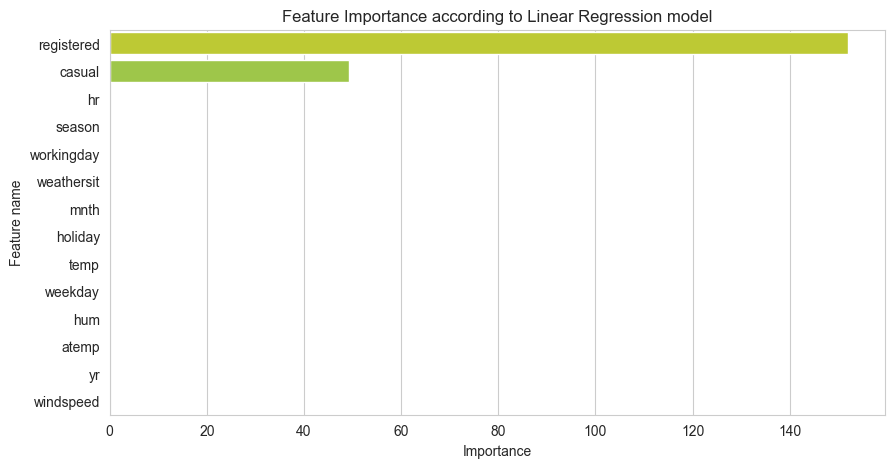

Самые значимые 10 признаков:


,Importance
registered,151.93102
casual,49.35326
hr,-0.00000
season,-0.00000
workingday,-0.00000
weathersit,0.00000
mnth,0.00000
holiday,0.00000
temp,-0.00000
weekday,-0.00000


In [40]:
feature_importance_linreg = pd.DataFrame({'Importance': lr_model.coef_}, index=X_train.columns).sort_values(by='Importance', key=abs, ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(y = feature_importance_linreg.index, x = feature_importance_linreg['Importance'], hue = feature_importance_linreg.index, palette='viridis_r')
plt.title('Feature Importance according to Linear Regression model')
plt.ylabel('Feature name')
plt.show()

print('Самые значимые 10 признаков:')
feature_importance_linreg.head(10)

In [41]:
wi_std = lr_model.coef_
b_std = lr_model.intercept_

means = std_scaler.mean_
stds = std_scaler.scale_

wi = wi_std / stds
b = b_std - np.sum((wi_std * means) / stds)

print("Коэффициенты для стандартизированных признаков:", np.round(wi_std,5))
print("Свободный член для стандартизированных признаков:", np.round(b_std,5))

print("Коэффициенты для нестандартизированных признаков:", np.round(wi,5))
print("Свободный член для нестандартизированных признаков:", np.round(b,5))

Коэффициенты для стандартизированных признаков: [ -0.        0.        0.       -0.        0.       -0.       -0.
   0.       -0.        0.       -0.       -0.       49.35326 151.93102]
Свободный член для стандартизированных признаков: 190.0906
Коэффициенты для нестандартизированных признаков: [-0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0. -0.  1.  1.]
Свободный член для нестандартизированных признаков: 0.0


Собственно линейная регрессия угадала то, что было понятно на первых этапах EDA. Что признак cnt это сумма двух признаков registered и casual. Именно об этом говорят две последние единицы в пересчитанных относительно нестандартизированных признаков X_train

Но что будет, если убрать эти признаки и обучить линейную регрессию без них?

In [42]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled[:,:-2], y_train)

y_train_pred = lr_model.predict(X_train_scaled[:,:-2])
y_test_pred = lr_model.predict(X_test_scaled[:,:-2])

results.loc[len(results)] = ['Linear Regression without REGISTERED, CASUAL'] + my_metrics(y_train, y_test, y_train_pred, y_test_pred)
results

,Название модели,MAE test,MSE test,RMSE test,R2 test,MAE train,MSE train,RMSE train,R2 train
0,Linear Regression,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000
1,"Linear Regression without REGISTERED, CASUAL",104.34906,19007.64218,137.86821,0.38514,106.31827,20229.88239,142.23179,0.38913


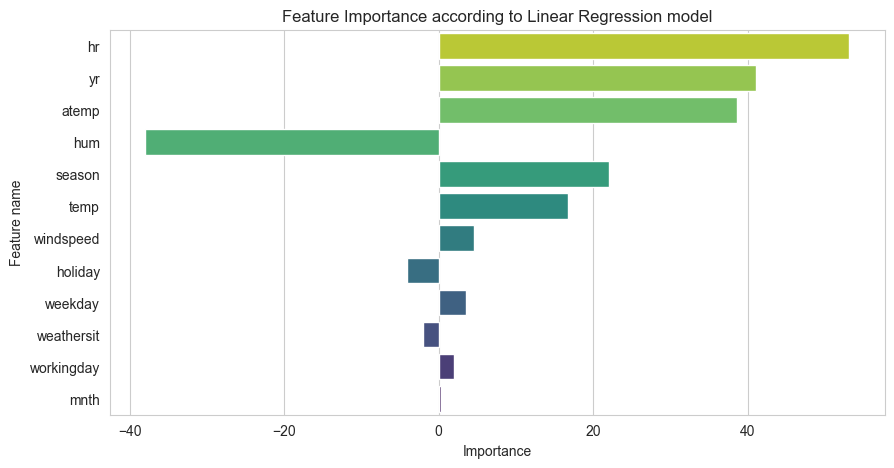

Самые значимые 10 признаков:


,Importance
hr,53.18243
yr,41.07799
atemp,38.56960
hum,-38.05247
season,22.00584
temp,16.70163
windspeed,4.59920
holiday,-4.13741
weekday,3.49640
weathersit,-2.08894


In [43]:
feature_importance_linreg = pd.DataFrame({'Importance': lr_model.coef_}, index=X_train.columns[:-2]).sort_values(by='Importance', key=abs, ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(y = feature_importance_linreg.index, x = feature_importance_linreg['Importance'], hue = feature_importance_linreg.index, palette='viridis_r')
plt.title('Feature Importance according to Linear Regression model')
plt.ylabel('Feature name')
plt.show()

print('Самые значимые 10 признаков:')
feature_importance_linreg.head(10)

**Вывод**: линейная регрессия прекрасно сработала, когда в датасете оставались два признака, сумма которых и давала целевую переменную.

Но такие признаки не должны быть известны в будущих данных (так по сути своей тоже могут быть именно целевыми). Так что странно рассматривать такие датасеты, в которых можно построить идеальную модель, такую далекую от реальной проблематики. Поэтому дальше мы также и будем строить модели на полном датасете\ датасете без признаков-прямых подсказок (registred, casual)

## 2.3. RandomForestRegressor

In [44]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train_scaled, y_train)

y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)

results.loc[len(results)] = ['Random Forest Regressor'] + my_metrics(y_train, y_test, y_train_pred, y_test_pred)

In [45]:
results

,Название модели,MAE test,MSE test,RMSE test,R2 test,MAE train,MSE train,RMSE train,R2 train
0,Linear Regression,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000
1,"Linear Regression without REGISTERED, CASUAL",104.34906,19007.64218,137.86821,0.38514,106.31827,20229.88239,142.23179,0.38913
2,Random Forest Regressor,0.83694,5.35735,2.31459,0.99983,0.35278,0.92495,0.96174,0.99997


In [46]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train_scaled[:,:-2], y_train)

y_train_pred = rf_model.predict(X_train_scaled[:,:-2])
y_test_pred = rf_model.predict(X_test_scaled[:,:-2])

results.loc[len(results)] = ['Random Forest Regressor without REGISTERED, CASUAL'] + my_metrics(y_train, y_test, y_train_pred, y_test_pred)

In [47]:
results

,Название модели,MAE test,MSE test,RMSE test,R2 test,MAE train,MSE train,RMSE train,R2 train
0,Linear Regression,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000
1,"Linear Regression without REGISTERED, CASUAL",104.34906,19007.64218,137.86821,0.38514,106.31827,20229.88239,142.23179,0.38913
2,Random Forest Regressor,0.83694,5.35735,2.31459,0.99983,0.35278,0.92495,0.96174,0.99997
3,"Random Forest Regressor without REGISTERED, CA...",24.38104,1698.89348,41.21764,0.94504,9.37623,251.13841,15.84735,0.99242


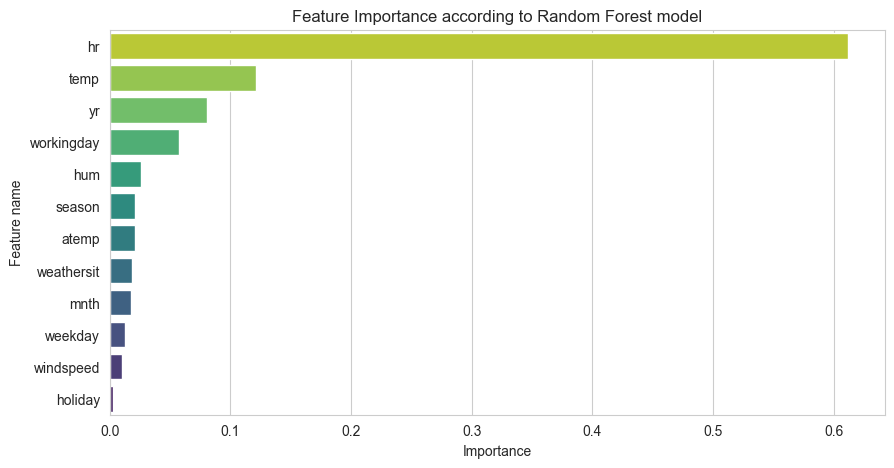

Самые значимые 10 признаков:


,Importance
hr,0.61150
temp,0.12118
yr,0.08080
workingday,0.05762
hum,0.02628
season,0.02084
atemp,0.02079
weathersit,0.01832
mnth,0.01743
weekday,0.01272


In [48]:
feature_importance_rf = pd.DataFrame({'Importance': rf_model.feature_importances_}, index=X_train.columns[:-2]).sort_values(by='Importance', key=abs, ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(y = feature_importance_rf.index, x = feature_importance_rf['Importance'], hue = feature_importance_rf.index, palette='viridis_r')
plt.title('Feature Importance according to Random Forest model')
plt.ylabel('Feature name')
plt.show()

print('Самые значимые 10 признаков:')
feature_importance_rf.head(10)

## 2.4. XGBRegressor

In [49]:
xgb_model = xgb.XGBRegressor()

xgb_model.fit(X_train_scaled, y_train)

y_train_pred = xgb_model.predict(X_train_scaled)
y_test_pred = xgb_model.predict(X_test_scaled)

results.loc[len(results)] = ['XGB Regressor'] + my_metrics(y_train, y_test, y_train_pred, y_test_pred)
results

,Название модели,MAE test,MSE test,RMSE test,R2 test,MAE train,MSE train,RMSE train,R2 train
0,Linear Regression,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000
1,"Linear Regression without REGISTERED, CASUAL",104.34906,19007.64218,137.86821,0.38514,106.31827,20229.88239,142.23179,0.38913
2,Random Forest Regressor,0.83694,5.35735,2.31459,0.99983,0.35278,0.92495,0.96174,0.99997
3,"Random Forest Regressor without REGISTERED, CA...",24.38104,1698.89348,41.21764,0.94504,9.37623,251.13841,15.84735,0.99242
4,XGB Regressor,1.98236,16.15359,4.01915,0.99948,1.26884,3.61562,1.90148,0.99989


In [50]:
xgb_model = xgb.XGBRegressor()

xgb_model.fit(X_train_scaled[:,:-2], y_train)

y_train_pred = xgb_model.predict(X_train_scaled[:,:-2])
y_test_pred = xgb_model.predict(X_test_scaled[:,:-2])

results.loc[len(results)] = ['XGB Regressor without REGISTERED, CASUAL'] + my_metrics(y_train, y_test, y_train_pred, y_test_pred)
results

,Название модели,MAE test,MSE test,RMSE test,R2 test,MAE train,MSE train,RMSE train,R2 train
0,Linear Regression,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000
1,"Linear Regression without REGISTERED, CASUAL",104.34906,19007.64218,137.86821,0.38514,106.31827,20229.88239,142.23179,0.38913
2,Random Forest Regressor,0.83694,5.35735,2.31459,0.99983,0.35278,0.92495,0.96174,0.99997
3,"Random Forest Regressor without REGISTERED, CA...",24.38104,1698.89348,41.21764,0.94504,9.37623,251.13841,15.84735,0.99242
4,XGB Regressor,1.98236,16.15359,4.01915,0.99948,1.26884,3.61562,1.90148,0.99989
5,"XGB Regressor without REGISTERED, CASUAL",25.09098,1550.82239,39.38048,0.94983,18.66838,830.23322,28.81377,0.97493


In [51]:
X_train

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
instant,,,,,,,,,,,,,,
6026,3,0,9,15,0,2,1,1,0.74000,0.66670,0.51000,0.29850,35,145
2859,2,0,5,0,0,3,1,3,0.52000,0.50000,0.77000,0.16420,5,22
7079,4,0,10,13,0,4,1,2,0.50000,0.48480,0.88000,0.16420,10,64
15856,4,1,10,20,0,6,0,2,0.52000,0.50000,0.72000,0.22390,58,238
16874,4,1,12,20,0,1,1,1,0.46000,0.45450,0.88000,0.25370,13,287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11285,2,1,4,9,0,5,1,1,0.46000,0.45450,0.88000,0.08960,30,329
11965,2,1,5,17,0,5,1,1,0.66000,0.62120,0.34000,0.13430,124,688
5391,3,0,8,12,0,3,1,1,0.80000,0.72730,0.43000,0.28360,26,163


In [52]:
categorical_columns = ['season', 'yr', 'mnth', 'hr', 'holiday','weekday', 'workingday','weathersit']
num_columns = ['temp', 'atemp', 'hum', 'windspeed']

X_train_rgb = X_train[categorical_columns + num_columns]
X_train_rgb[categorical_columns] = X_train_rgb[categorical_columns].astype('category')

X_test_rgb = X_test[categorical_columns + num_columns]
X_test_rgb[categorical_columns] = X_test_rgb[categorical_columns].astype('category')

In [53]:
X_train_rgb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15641 entries, 6026 to 15796
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      15641 non-null  category
 1   yr          15641 non-null  category
 2   mnth        15641 non-null  category
 3   hr          15641 non-null  category
 4   holiday     15641 non-null  category
 5   weekday     15641 non-null  category
 6   workingday  15641 non-null  category
 7   weathersit  15641 non-null  category
 8   temp        15641 non-null  float64 
 9   atemp       15641 non-null  float64 
 10  hum         15641 non-null  float64 
 11  windspeed   15641 non-null  float64 
dtypes: category(8), float64(4)
memory usage: 735.4 KB


In [54]:
xgb_model_category = xgb.XGBRegressor(enable_categorical = True)

xgb_model_category.fit(X_train_rgb, y_train)

y_train_pred = xgb_model_category.predict(X_train_rgb)
y_test_pred = xgb_model_category.predict(X_test_rgb)

results.loc[len(results)] = ['XGB Regressor with categories without REGISTERED, CASUAL'] + my_metrics(y_train, y_test, y_train_pred, y_test_pred)
results

,Название модели,MAE test,MSE test,RMSE test,R2 test,MAE train,MSE train,RMSE train,R2 train
0,Linear Regression,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000
1,"Linear Regression without REGISTERED, CASUAL",104.34906,19007.64218,137.86821,0.38514,106.31827,20229.88239,142.23179,0.38913
2,Random Forest Regressor,0.83694,5.35735,2.31459,0.99983,0.35278,0.92495,0.96174,0.99997
3,"Random Forest Regressor without REGISTERED, CA...",24.38104,1698.89348,41.21764,0.94504,9.37623,251.13841,15.84735,0.99242
4,XGB Regressor,1.98236,16.15359,4.01915,0.99948,1.26884,3.61562,1.90148,0.99989
5,"XGB Regressor without REGISTERED, CASUAL",25.09098,1550.82239,39.38048,0.94983,18.66838,830.23322,28.81377,0.97493
6,XGB Regressor with categories without REGISTER...,25.30062,1610.49913,40.13102,0.94790,15.96430,574.13774,23.96117,0.98266


In [55]:
xgb_model_category.feature_importances_

array([0.07304886, 0.18689251, 0.01686975, 0.19069985, 0.00804356,
       0.01961019, 0.28232893, 0.04881186, 0.11859935, 0.03852258,
       0.01327174, 0.00330077], dtype=float32)

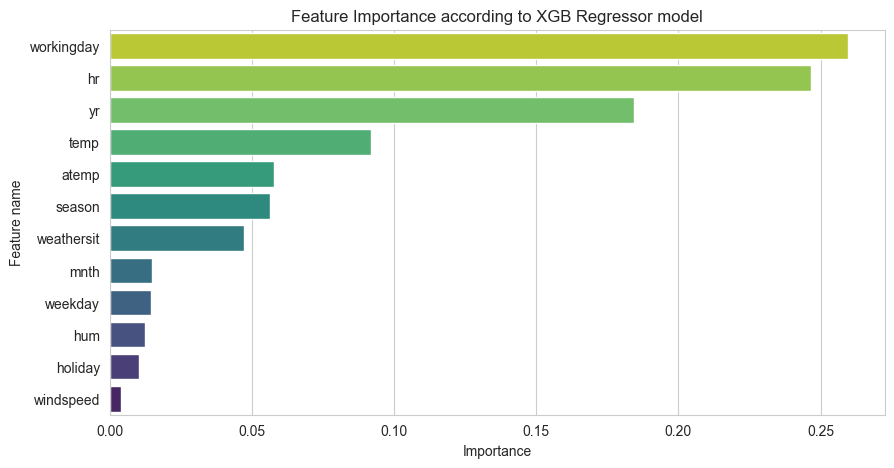

Самые значимые 10 признаков:


,Importance
workingday,0.25957
hr,0.24658
yr,0.18434
temp,0.09206
atemp,0.05765
season,0.05627
weathersit,0.04724
mnth,0.01507
weekday,0.01454
hum,0.01232


In [56]:
feature_importance_xgb = pd.DataFrame({'Importance': xgb_model.feature_importances_}, index=X_train.columns[:-2]).sort_values(by='Importance', key=abs, ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(y = feature_importance_xgb.index, x = feature_importance_xgb['Importance'], hue = feature_importance_xgb.index, palette='viridis_r')
plt.title('Feature Importance according to XGB Regressor model')
plt.ylabel('Feature name')
plt.show()

print('Самые значимые 10 признаков:')
feature_importance_xgb.head(10)

## 2.5. CatBoost Regressor

In [57]:
model_catboost = CatBoostRegressor(verbose = 100)
model_catboost.fit(X_train_rgb, y_train, cat_features=categorical_columns)

y_train_pred = model_catboost.predict(X_train_rgb)
y_test_pred = model_catboost.predict(X_test_rgb)

results.loc[len(results)] = ['CatBoost Regressor with categories without REGISTERED, CASUAL'] + my_metrics(y_train, y_test, y_train_pred, y_test_pred)
results

Learning rate set to 0.063223
0:	learn: 174.7184463	total: 171ms	remaining: 2m 50s
100:	learn: 61.9232934	total: 2.64s	remaining: 23.5s
200:	learn: 55.8192259	total: 5.03s	remaining: 20s
300:	learn: 52.2441391	total: 7.42s	remaining: 17.2s
400:	learn: 49.5097444	total: 10.4s	remaining: 15.6s
500:	learn: 47.5689406	total: 13.2s	remaining: 13.2s
600:	learn: 46.1057468	total: 15.8s	remaining: 10.5s
700:	learn: 44.5506038	total: 18.3s	remaining: 7.79s
800:	learn: 43.2216110	total: 20.7s	remaining: 5.15s
900:	learn: 42.1311949	total: 23.2s	remaining: 2.55s
999:	learn: 41.2111663	total: 25.9s	remaining: 0us


,Название модели,MAE test,MSE test,RMSE test,R2 test,MAE train,MSE train,RMSE train,R2 train
0,Linear Regression,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000
1,"Linear Regression without REGISTERED, CASUAL",104.34906,19007.64218,137.86821,0.38514,106.31827,20229.88239,142.23179,0.38913
2,Random Forest Regressor,0.83694,5.35735,2.31459,0.99983,0.35278,0.92495,0.96174,0.99997
3,"Random Forest Regressor without REGISTERED, CA...",24.38104,1698.89348,41.21764,0.94504,9.37623,251.13841,15.84735,0.99242
4,XGB Regressor,1.98236,16.15359,4.01915,0.99948,1.26884,3.61562,1.90148,0.99989
5,"XGB Regressor without REGISTERED, CASUAL",25.09098,1550.82239,39.38048,0.94983,18.66838,830.23322,28.81377,0.97493
6,XGB Regressor with categories without REGISTER...,25.30062,1610.49913,40.13102,0.94790,15.96430,574.13774,23.96117,0.98266
7,CatBoost Regressor with categories without REG...,25.89586,1669.82649,40.86351,0.94598,25.22620,1529.03503,39.10288,0.95383


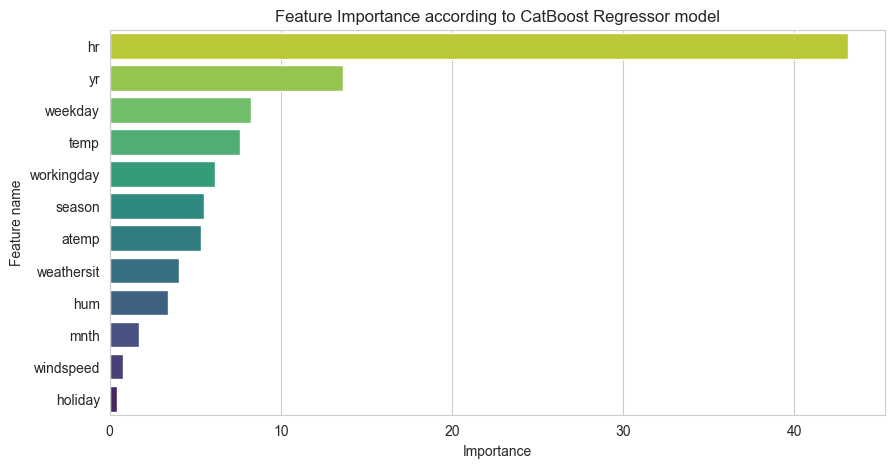

Самые значимые 10 признаков:


,Importance
hr,43.12860
yr,13.65853
weekday,8.26775
temp,7.59293
workingday,6.16986
season,5.49567
atemp,5.31172
weathersit,4.06561
hum,3.40527
mnth,1.73144


In [58]:
feature_importance_catboost = pd.DataFrame({'Importance': model_catboost.get_feature_importance()}, index=X_train.columns[:-2]).sort_values(by='Importance', key=abs, ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(y = feature_importance_catboost.index, x = feature_importance_catboost['Importance'], hue = feature_importance_catboost.index, palette='viridis_r')
plt.title('Feature Importance according to CatBoost Regressor model')
plt.ylabel('Feature name')
plt.show()

print('Самые значимые 10 признаков:')
feature_importance_catboost.head(10)

In [59]:
catboost_model = CatBoostRegressor(verbose = 100)

catboost_model.fit(X_train_scaled[:,:-2], y_train)

y_train_pred = catboost_model.predict(X_train_scaled[:,:-2])
y_test_pred = catboost_model.predict(X_test_scaled[:,:-2])

results.loc[len(results)] = ['CatBoost Regressor without REGISTERED, CASUAL'] + my_metrics(y_train, y_test, y_train_pred, y_test_pred)
results




Learning rate set to 0.063223
0:	learn: 174.8527032	total: 3.79ms	remaining: 3.78s
100:	learn: 54.9133891	total: 395ms	remaining: 3.51s
200:	learn: 45.8174512	total: 828ms	remaining: 3.29s
300:	learn: 41.9330537	total: 1.24s	remaining: 2.88s
400:	learn: 39.6922700	total: 1.54s	remaining: 2.31s
500:	learn: 37.9920272	total: 1.84s	remaining: 1.84s
600:	learn: 36.6470255	total: 2.14s	remaining: 1.42s
700:	learn: 35.5904972	total: 2.44s	remaining: 1.04s
800:	learn: 34.6665744	total: 2.71s	remaining: 674ms
900:	learn: 33.8703489	total: 3.01s	remaining: 331ms
999:	learn: 33.1738992	total: 3.29s	remaining: 0us


,Название модели,MAE test,MSE test,RMSE test,R2 test,MAE train,MSE train,RMSE train,R2 train
0,Linear Regression,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000
1,"Linear Regression without REGISTERED, CASUAL",104.34906,19007.64218,137.86821,0.38514,106.31827,20229.88239,142.23179,0.38913
2,Random Forest Regressor,0.83694,5.35735,2.31459,0.99983,0.35278,0.92495,0.96174,0.99997
3,"Random Forest Regressor without REGISTERED, CA...",24.38104,1698.89348,41.21764,0.94504,9.37623,251.13841,15.84735,0.99242
4,XGB Regressor,1.98236,16.15359,4.01915,0.99948,1.26884,3.61562,1.90148,0.99989
5,"XGB Regressor without REGISTERED, CASUAL",25.09098,1550.82239,39.38048,0.94983,18.66838,830.23322,28.81377,0.97493
6,XGB Regressor with categories without REGISTER...,25.30062,1610.49913,40.13102,0.94790,15.96430,574.13774,23.96117,0.98266
7,CatBoost Regressor with categories without REG...,25.89586,1669.82649,40.86351,0.94598,25.22620,1529.03503,39.10288,0.95383
8,"CatBoost Regressor without REGISTERED, CASUAL",23.33945,1371.11262,37.02854,0.95565,21.10373,1100.50759,33.17390,0.96677


In [60]:
catboost_model = CatBoostRegressor(verbose = 100)

catboost_model.fit(X_train_scaled, y_train)

y_train_pred = catboost_model.predict(X_train_scaled)
y_test_pred = catboost_model.predict(X_test_scaled)

results.loc[len(results)] = ['CatBoost Regressor'] + my_metrics(y_train, y_test, y_train_pred, y_test_pred)
results




Learning rate set to 0.063223
0:	learn: 171.3442379	total: 3.3ms	remaining: 3.29s
100:	learn: 5.0563215	total: 332ms	remaining: 2.96s
200:	learn: 3.8177977	total: 680ms	remaining: 2.7s
300:	learn: 3.1867070	total: 1s	remaining: 2.33s
400:	learn: 2.8192047	total: 1.34s	remaining: 2s
500:	learn: 2.5806293	total: 1.66s	remaining: 1.66s
600:	learn: 2.3755032	total: 1.98s	remaining: 1.31s
700:	learn: 2.2110797	total: 2.31s	remaining: 984ms
800:	learn: 2.0631938	total: 2.64s	remaining: 656ms
900:	learn: 1.9520292	total: 2.96s	remaining: 326ms
999:	learn: 1.8529217	total: 3.29s	remaining: 0us


,Название модели,MAE test,MSE test,RMSE test,R2 test,MAE train,MSE train,RMSE train,R2 train
0,Linear Regression,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000
1,"Linear Regression without REGISTERED, CASUAL",104.34906,19007.64218,137.86821,0.38514,106.31827,20229.88239,142.23179,0.38913
2,Random Forest Regressor,0.83694,5.35735,2.31459,0.99983,0.35278,0.92495,0.96174,0.99997
3,"Random Forest Regressor without REGISTERED, CA...",24.38104,1698.89348,41.21764,0.94504,9.37623,251.13841,15.84735,0.99242
4,XGB Regressor,1.98236,16.15359,4.01915,0.99948,1.26884,3.61562,1.90148,0.99989
5,"XGB Regressor without REGISTERED, CASUAL",25.09098,1550.82239,39.38048,0.94983,18.66838,830.23322,28.81377,0.97493
6,XGB Regressor with categories without REGISTER...,25.30062,1610.49913,40.13102,0.94790,15.96430,574.13774,23.96117,0.98266
7,CatBoost Regressor with categories without REG...,25.89586,1669.82649,40.86351,0.94598,25.22620,1529.03503,39.10288,0.95383
8,"CatBoost Regressor without REGISTERED, CASUAL",23.33945,1371.11262,37.02854,0.95565,21.10373,1100.50759,33.17390,0.96677
9,CatBoost Regressor,1.37578,7.50766,2.74001,0.99976,1.16830,3.43332,1.85292,0.99990


# 3. Заключение

In [61]:
results = results.sort_values(by='R2 test', ascending=False)
results

,Название модели,MAE test,MSE test,RMSE test,R2 test,MAE train,MSE train,RMSE train,R2 train
0,Linear Regression,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000
2,Random Forest Regressor,0.83694,5.35735,2.31459,0.99983,0.35278,0.92495,0.96174,0.99997
9,CatBoost Regressor,1.37578,7.50766,2.74001,0.99976,1.16830,3.43332,1.85292,0.99990
4,XGB Regressor,1.98236,16.15359,4.01915,0.99948,1.26884,3.61562,1.90148,0.99989
8,"CatBoost Regressor without REGISTERED, CASUAL",23.33945,1371.11262,37.02854,0.95565,21.10373,1100.50759,33.17390,0.96677
5,"XGB Regressor without REGISTERED, CASUAL",25.09098,1550.82239,39.38048,0.94983,18.66838,830.23322,28.81377,0.97493
6,XGB Regressor with categories without REGISTER...,25.30062,1610.49913,40.13102,0.94790,15.96430,574.13774,23.96117,0.98266
7,CatBoost Regressor with categories without REG...,25.89586,1669.82649,40.86351,0.94598,25.22620,1529.03503,39.10288,0.95383
3,"Random Forest Regressor without REGISTERED, CA...",24.38104,1698.89348,41.21764,0.94504,9.37623,251.13841,15.84735,0.99242
1,"Linear Regression without REGISTERED, CASUAL",104.34906,19007.64218,137.86821,0.38514,106.31827,20229.88239,142.23179,0.38913


В результате данной работы мы построили для предсказаний целевой переменной несколько моделей.

Были собраны данные по работе каждой модели на обучающей и тестовой выборках. Для каждой модели дополнительно были построены и визуализированы показатели важности признаков

Из-за особенностей начальной структуры датасета, в который фактически попали 3 целевых переменных (cnt = registered + casual, в то время как изучаем мы прогнозирование только для cnt общего числа велосипедов), линейная модель при наличии переменных casual, registred, с идеальной точностью знает предсказания для нашей задачи регрессии как сумму 2 признаков из датасета. Правильно ли это? Объективно? Я уверена, что нет. И настоящие "победители" нашего соревнования моделей - это модели, которые при отсутствующих признаках registered и casual показали лучшие результаты на тестовой выборке, а именно CatBoost и XGB regressor




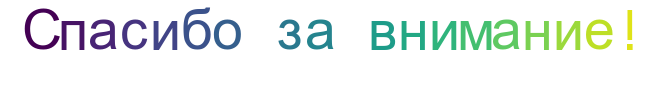

In [62]:
cmap = plt.get_cmap('viridis');
plt.figure(figsize=(8, 1))
text = 'Спасибо за внимание!'
for i in range(len(text)):
    plt.text(0.05 + i*0.05, 0.5, text[i], fontsize=40, color=cmap(i / len(text)), ha='center')
plt.axis('off')
plt.show()